<h1>Описание проекта<span class="tocSkip"></span></h1>

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 




<h1>Описание данных<span class="tocSkip"></span></h1>

Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Портрет-пользователя" data-toc-modified-id="Портрет-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul>

## Изучение данных из файла

In [308]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy import stats as st
import numpy as np
import seaborn as sns

In [236]:
data = pd.read_csv('games.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Столбец User_Score имеет тип object, хотя в нём должны быть числовые данные. Посмотрим, какие значения он принимает.

In [237]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [238]:
data[data['User_Score']=='tbd'].shape

(2424, 11)

В User_Score присутствуют значения 'tbd' (2424 записей), скорее всего означающие 'to be determined'(подлежит определению), т.е. эти значения можно интерпретировать как NaN. Заменим 'tbd' на NaN в user_score.

In [239]:
data.loc[data['User_Score']=='tbd', 'User_Score'] = np.nan

In [240]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
User_Score,9125,0.55
Critic_Score,8578,0.51
Rating,6766,0.40
Year_of_Release,269,0.02
Name,2,0.00
Genre,2,0.00
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


In [241]:
data.duplicated().sum()

0

Возможно, пропуски в Rating присутствуют в основном в старых играх и обусловлены тем, что ESRB ещё не начала свою деятельность. 

Также, возможно, пропуски в Critic_Score и User_Score более характерны для старых игр и обусловлены отсутствием масштабности рецензирования игр в те годы.

Проверим эти гипотезы, построив графики "ящик с усами". 

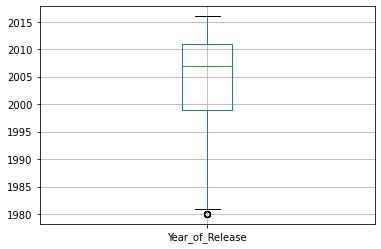

In [242]:
data[data['Rating'].isna()].boxplot('Year_of_Release');

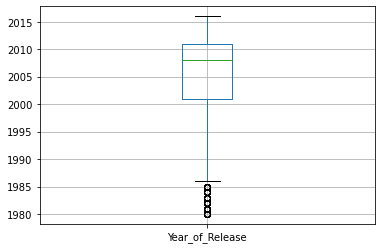

In [243]:
data[data['Critic_Score'].isna()].boxplot('Year_of_Release');

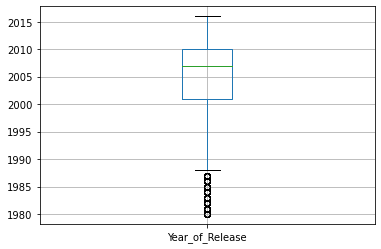

In [244]:
data[data['User_Score'].isna()].boxplot('Year_of_Release');

### Вывод

Присутствуют пропуски в столбцах User_Score(0.55%), Critic_Score(0.51%), Rating(0.40%), а также небольшое количество пропусков в Year_of_Release(269 записей - 0.02%), Name и Genre(по две записи). Гипотезы о типичности пропусков в User_Score, Critic_Score и Rating для старых игр не подтвердились. В Rating значения NaN можно объяснить незаинтересованностью ESRB в выставлении рейтинга. Пропуски во всех столбцах в основном обусловлены, скорее всего, ошибками при сборе данных/составлении таблицы, т.е. полностью случайны.

## Предобработка данных

Названия столбцов для удобства приведём к нижнему регистру. 
Пропуски в name, year_of_release и genre составляют небольшой процент, строки с ними удалим. 
В rating значения NaN заменим на 'undefined', чтобы не выкидывать их из анализа, т.к. эти пропуски, вероятно, не случайны.
Также создадим новый столбец 'all_sales' с суммарными продажами по всем регионам.

In [245]:
data.columns = data.columns.str.lower()

data = data.dropna(subset=['name', 'year_of_release', 'genre'])

data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.loc[data['rating'].isna(),'rating'] = 'undefined'


data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31


### Вывод

Во всех столбцах, кроме Rating причины пропусков мне видятся сугубо техническими(ошибки при сборе информации и составлении таблицы). Т.к. пропуски занимают значительный процент от всех записей, а заменить их достоверными данными не предоставляется возможным, оставим значения NaN, чтобы не терять данные для анализа, при котором тот или иной столбец с пропусками не используется и его значения можно проигнорировать.

## Анализ данных

Посмотрим на распределение по годам, чтобы выбрать актуальный период для анализа. 

In [246]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

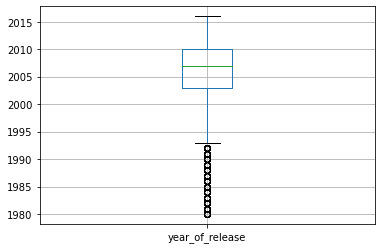

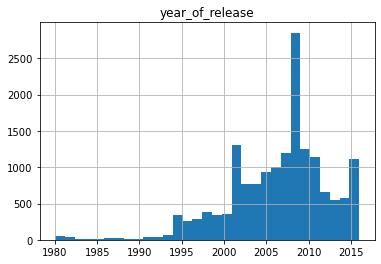

In [247]:
data.boxplot('year_of_release')
data.hist('year_of_release', bins=31);

Данные до 1993 года неважны, т.к. данных за этот период слишком мало.

Составим рейтинг платформ по суммарным продажам.

In [248]:
platform_r = data[data['year_of_release']>1993
                 ].groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()
platform_r.head(10)

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


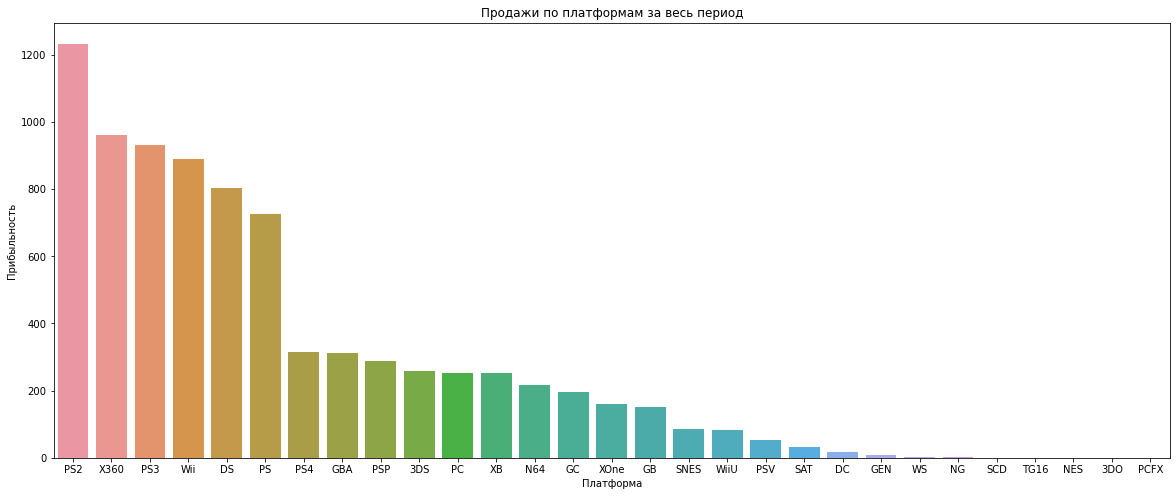

In [249]:
plt.figure(figsize=(20, 8))

sns.barplot(x= 'platform', y='all_sales', data=platform_r)
plt.title('Продажи по платформам за весь период')
plt.xlabel('Платформа')
plt.ylabel('Прибыльность');

Посмотрим, сколько игр выпускалось ежегодно для каждой платформы из топ-10 по суммарным продажам.

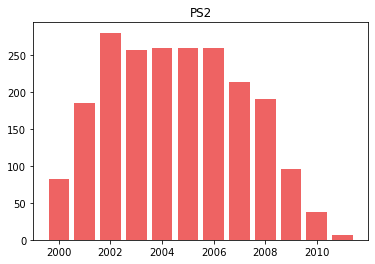

In [250]:
plt.bar(data[data['platform']=='PS2'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='PS2'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('PS2');

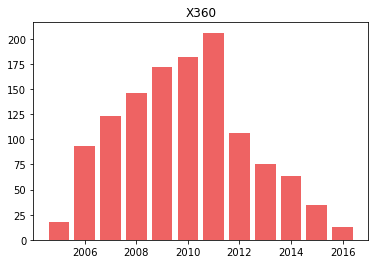

In [251]:
plt.bar(data[data['platform']=='X360'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='X360'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('X360');

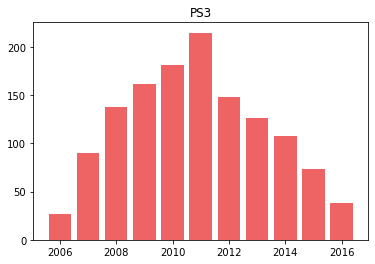

In [252]:
plt.bar(data[data['platform']=='PS3'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='PS3'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('PS3');

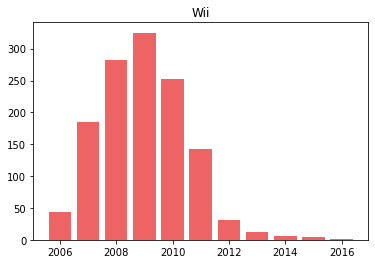

In [253]:
plt.bar(data[data['platform']=='Wii'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='Wii'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('Wii');

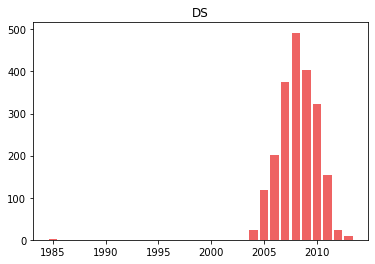

In [254]:
plt.bar(data[data['platform']=='DS'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='DS'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('DS');

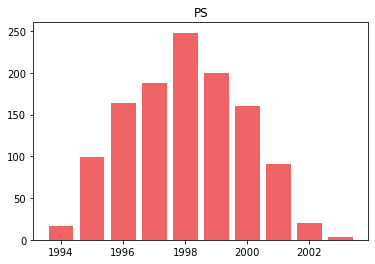

In [255]:
plt.bar(data[data['platform']=='PS'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='PS'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('PS');

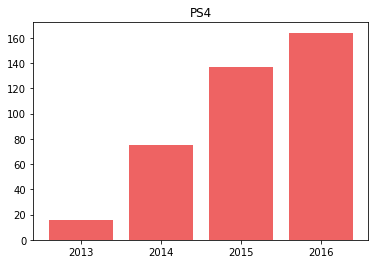

In [256]:
plt.xticks([2012, 2013, 2014, 2015, 2016])
plt.bar(data[data['platform']=='PS4'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='PS4'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('PS4');

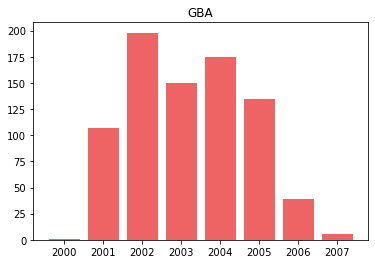

In [257]:
plt.bar(data[data['platform']=='GBA'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='GBA'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('GBA');

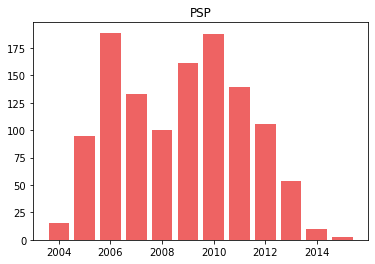

In [258]:
plt.bar(data[data['platform']=='PSP'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='PSP'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('PSP');

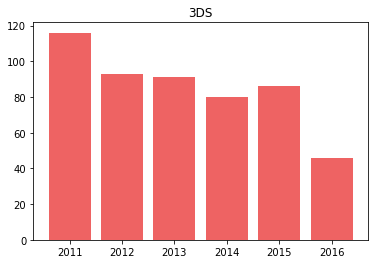

In [259]:
plt.bar(data[data['platform']=='3DS'].groupby('year_of_release')['name'].count().index,
        data[data['platform']=='3DS'].groupby('year_of_release')['name'].count(), color = '#EE6363')
plt.title('3DS');

Новые платформы появляются в среднем раз в 7 лет, старые исчезают в среднем за 11 лет. 

Актуальным периодом будем считать 2013-2016 года, так большинство платформ с самой высокой вурочкой за всё время, но с почти сошедшей на нет вуручкой к 2016 году не будут сильно влиять на статистику.

Составим рейтинг платформ по общим продажам за актуальный период времени.

In [260]:
dataActual = data[data['year_of_release']>2012]

dataActual.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: all_sales, dtype: float64

Посмотрим, как менялись продажи по каждой платформе в течении времени.

In [261]:
df1 = dataActual.groupby(['platform','year_of_release'])['all_sales'].sum().reset_index()
df1

,platform,year_of_release,all_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


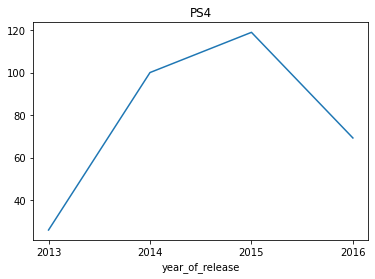

In [320]:
#форматирование чисел на оси Х для их корректоного отображения как целых чисел
locator = matplotlib.ticker.MultipleLocator(1) 
plt.gca().xaxis.set_major_locator(locator) 
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

df1[df1['platform']=='PS4'].set_index('year_of_release')['all_sales'].plot()
plt.title('PS4');

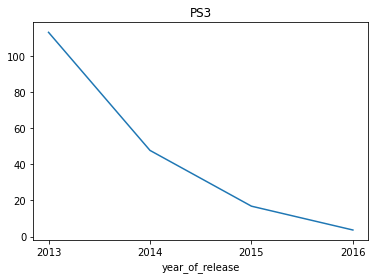

In [321]:
locator = matplotlib.ticker.MultipleLocator(1) 
plt.gca().xaxis.set_major_locator(locator) 
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

df1[df1['platform']=='PS3'].set_index('year_of_release')['all_sales'].plot()
plt.title('PS3');

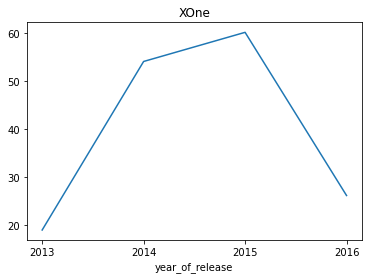

In [322]:
locator = matplotlib.ticker.MultipleLocator(1) 
plt.gca().xaxis.set_major_locator(locator) 
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

df1[df1['platform']=='XOne'].set_index('year_of_release')['all_sales'].plot()
plt.title('XOne');

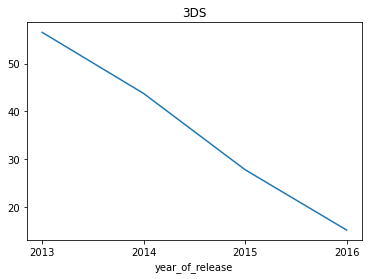

In [323]:
locator = matplotlib.ticker.MultipleLocator(1) 
plt.gca().xaxis.set_major_locator(locator) 
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

df1[df1['platform']=='3DS'].set_index('year_of_release')['all_sales'].plot()
plt.title('3DS');

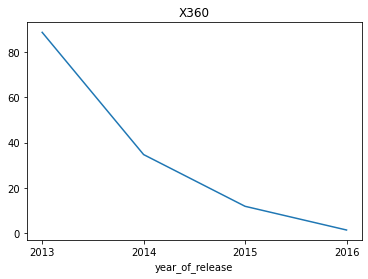

In [324]:
locator = matplotlib.ticker.MultipleLocator(1) 
plt.gca().xaxis.set_major_locator(locator) 
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

df1[df1['platform']=='X360'].set_index('year_of_release')['all_sales'].plot()
plt.title('X360');

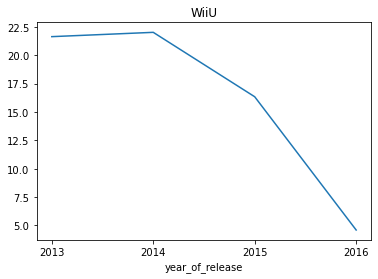

In [325]:
locator = matplotlib.ticker.MultipleLocator(1) 
plt.gca().xaxis.set_major_locator(locator) 
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

df1[df1['platform']=='WiiU'].set_index('year_of_release')['all_sales'].plot()
plt.title('WiiU');

Лидируют по продажам PS4, PS3, XOne, 3DS и X360. Однако продажи по всем падают. Потенциально наиболее прибыльные - PS4, XOne и 3DS.

Посмотрим на распределение продаж  для каждой платформы.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.000000,257.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,72.091270,6.748249,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485992,1.459481,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.000000,6.100000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.000000,7.000000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.000000,7.800000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


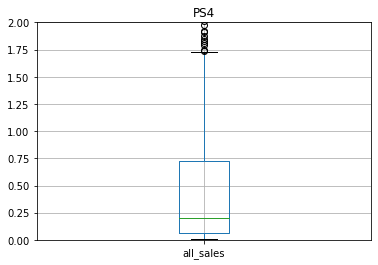

In [328]:
plt.ylim(0, 2)
plt.title('PS4')
dataActual[dataActual['platform']=='PS4'].boxplot('all_sales')
dataActual[dataActual['platform']=='PS4'].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


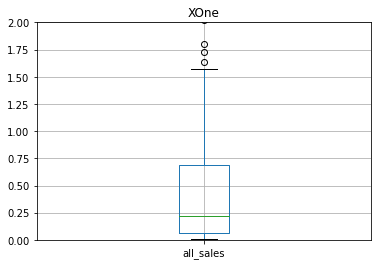

In [329]:
plt.ylim(0, 2)
plt.title('XOne')
dataActual[dataActual['platform']=='XOne'].boxplot('all_sales')
dataActual[dataActual['platform']=='XOne'].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,303.000000,303.000000,303.000000,303.000000,303.000000,71.000000,80.000000,303.000000
mean,2014.287129,0.126073,0.102178,0.223795,0.020726,68.338028,6.976250,0.472772
std,1.054821,0.499331,0.381832,0.566661,0.078509,13.093012,1.538884,1.381347
min,2013.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2.400000,0.010000
25%,2013.000000,0.000000,0.000000,0.010000,0.000000,61.000000,6.300000,0.040000
50%,2014.000000,0.000000,0.000000,0.060000,0.000000,69.000000,7.300000,0.090000
75%,2015.000000,0.050000,0.040000,0.145000,0.010000,78.500000,8.200000,0.280000
max,2016.000000,5.280000,4.190000,4.350000,0.780000,91.000000,9.000000,14.600000


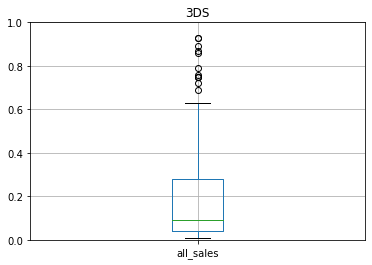

In [330]:
plt.ylim(0, 1)
plt.title('3DS')
dataActual[dataActual['platform']=='3DS'].boxplot('all_sales')
dataActual[dataActual['platform']=='3DS'].describe()

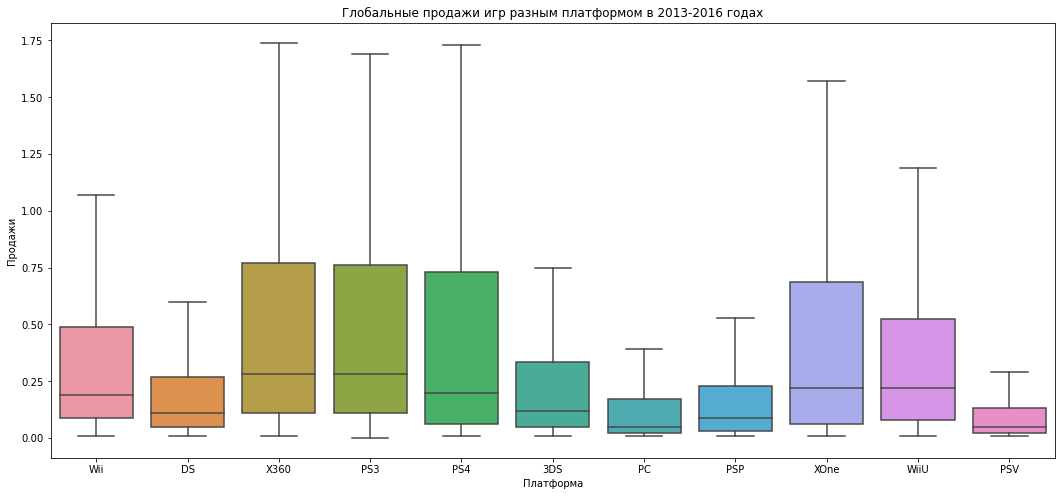

In [272]:
act_platforms= dataActual.groupby('platform')['all_sales'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=(18, 8))
sns.boxplot(x="platform", y="all_sales", data=data[data.platform.isin(act_platforms)], orient="v", showfliers=False)
plt.title('Глобальные продажи игр разным платформом в 2013-2016 годах') 
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()

Средняя выручка PS4 ~0.8 млн., XOne - 0.64 млн., 3DS - 0.47млн.. Медианная выручка PS4 - 0.2 млн., XOne - 0.22 млн., 3DS - 0.09млн.. 

Оценим корреляции между продажами и оценкой критиков, а также между продажами и пользовательской оценкой для каждой платформы.

0.406567902061781

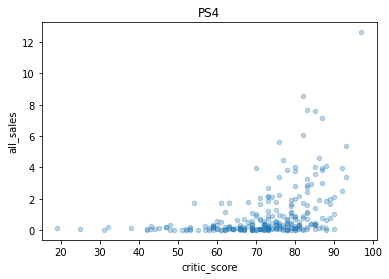

In [332]:
dataActual[dataActual['platform']=='PS4'].plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('PS4')
dataActual[dataActual['platform']=='PS4']['all_sales'].corr(df[df['platform']=='PS4']['critic_score'])

-0.031957110204556424

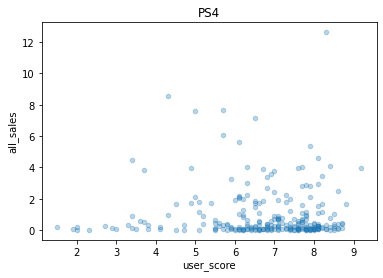

In [333]:
dataActual[dataActual['platform']=='PS4'].plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('PS4')
dataActual[dataActual['platform']=='PS4']['all_sales'].corr(df[df['platform']=='PS4']['user_score'])

0.41699832800840175

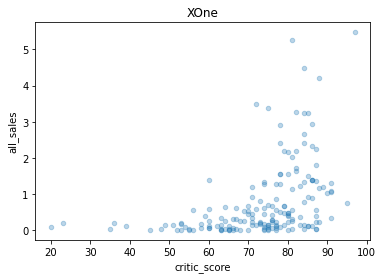

In [334]:
dataActual[dataActual['platform']=='XOne'].plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('XOne')
dataActual[dataActual['platform']=='XOne']['all_sales'].corr(df[df['platform']=='XOne']['critic_score'])

-0.06892505328279412

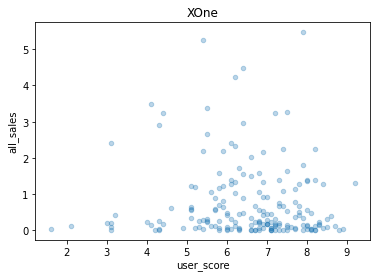

In [335]:
dataActual[dataActual['platform']=='XOne'].plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('XOne')
dataActual[dataActual['platform']=='XOne']['all_sales'].corr(df[df['platform']=='XOne']['user_score'])

0.35705661422881035

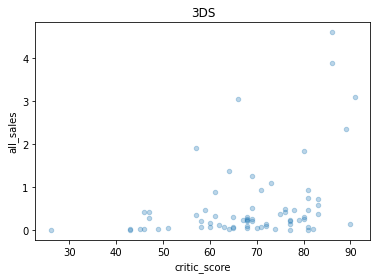

In [336]:
dataActual[dataActual['platform']=='3DS'].plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('3DS')
dataActual[dataActual['platform']=='3DS']['all_sales'].corr(df[df['platform']=='3DS']['critic_score'])

0.24150411773563016

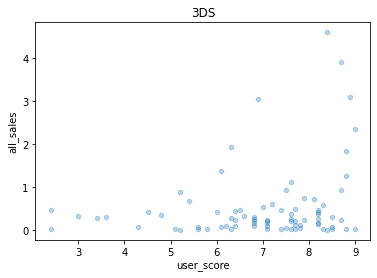

In [337]:
dataActual[dataActual['platform']=='3DS'].plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('3DS')
dataActual[dataActual['platform']=='3DS']['all_sales'].corr(df[df['platform']=='3DS']['user_score'])

Корреляция между продажами и пользовательской оценкой отсутствует, либо незначительна. Шанс получить наибольшую прибыль есть только у игр с оценками критиков 70-100, в остальном же корреляция между продажами и оценкой критиков очень слабая.

Посмотрим на общее распределение игр по жанрам

In [280]:
dataActual.groupby('genre')['all_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: all_sales, dtype: float64

In [281]:
dataActual.groupby('genre')['all_sales'].sum().sort_values(ascending=False)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: all_sales, dtype: float64

In [282]:
dataActual.groupby('genre')['all_sales'].count().sort_values(ascending=False)


genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: all_sales, dtype: int64

Наиболее прибыльный жанр - Shooter. Наименее прибыльный жанр - Adventure. Наиболее популярный - Action, наименее популярный - Puzzle.

### Вывод

Актуальным периодом выбран 2013-2016 г.г. Наибольшая суммарная прибыль у платформ PS4(314.14млн.), PS3(181.43млн.), XOne(159.32млн.), 3DS(143.25млн.), X360(136.80млн.). Потенциально наиболее прибыльные - PS4, XOne и 3DS. Средняя выручка PS4 ~0.8 млн., XOne - 0.64 млн., 3DS - 0.47млн.. Медианная выручка PS4 - 0.2 млн., XOne - 0.22 млн., 3DS - 0.09млн.. Значимая корреляция между продажами и оценками отсутствует, однако получение сверхвыручки наиболее вероятно при высоких оценках критиков. Наиболее прибыльный жанр - Shooter(1.24млн. средняя выручка). Наименее прибыльный жанр - Adventure(0.096млн. средняя выручка). Самый распространённый и прибыльный жанр - Action(766 игр с сумарной прибылью в 321.87 млн.)

## Портрет пользователя

Самые популярные платформы по регионам.

In [283]:
dataActual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [284]:
dataActual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [285]:
dataActual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

Самые популярные жанры

In [286]:
dataActual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [287]:
dataActual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [288]:
dataActual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

Рейтинг ESRB

In [289]:
dataActual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M            165.21
undefined     89.42
E             79.05
E10+          54.24
T             49.79
Name: na_sales, dtype: float64

In [290]:
dataActual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M            145.32
E             83.36
undefined     78.91
E10+          42.69
T             41.95
Name: eu_sales, dtype: float64

In [291]:
dataActual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
undefined    85.05
T            20.59
E            15.14
M            14.11
E10+          5.89
Name: jp_sales, dtype: float64

### Вывод

Североамериканский пользователь предпочитает жанры Action и Shooter на платформе PS4, с возрастным рейтингом M. Европейский пользователь предпочитает жанр Action на платформе PS4, с возрастным рейтингом M. Японский пользователь предпочитает жанры Role-Playing и Action на платформе 3DS, с неизвестным возрастным рейтингом.

## Проверка гипотез

Нулевая гипотеза H₀ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза H₁ - средние пользовательские рейтинги платформ Xbox One и PC разные.

In [292]:
alpha = 0.05 

results = st.ttest_ind(dataActual[dataActual['platform']=='XOne']['user_score'], 
                       dataActual[dataActual['platform']=='PC']['user_score'], 
                       nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.1401265840361139
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза H₀ - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза H₁ - средние пользовательские рейтинги жанров Action и Sports разные.

In [293]:
results = st.ttest_ind(dataActual[dataActual['genre']=='Action']['user_score'], 
                       dataActual[dataActual['genre']=='Sports']['user_score'], 
                       nan_policy='omit')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, альтернативную гипотезу отвергнуть не получилось')
else:
    print('Не получилось отвергнуть нулевую гипотезу, отвергаем альтернативную гипотезу') 

p-значение: 1.0517832389142297e-27
Отвергаем нулевую гипотезу, альтернативную гипотезу отвергнуть не получилось


## Общий вывод

Наиболее популярные платформы за актуальный срок - PS4, PS3, XOne, 3DS и X360. Продажи по всем крупным платформам падают, скорее всего из-за экспансии мобильных игр, которые в данных отсутствуют. Продажи по PS3 и X360 падают значительно сильнее, чем у других платформ, вероятно потому что это предыдущее поколение PS4 и XOne соответственно.

Потенциально наиболее прибыльные платформы - PS4, XOne и 3DS. Средняя выручка PS4 ~0.8 млн., XOne - 0.64 млн., 3DS - 0.47млн.. Медианная выручка PS4 - 0.2 млн., XOne - 0.22 млн., 3DS - 0.09млн.. Наиболее прибыльный жанр - Shooter(1.24млн. средняя выручка).

Шанс получить наибольшую прибыль есть только у игр с оценками критиков 70-100, в остальном же ни пользовательские оценки, ни оценки критиков на прибыль сильно не влияют.

Североамериканский пользователь предпочитает жанры Action и Shooter на платформе PS4, с возрастным рейтингом M. Европейский пользователь предпочитает жанр Action на платформе PS4, с возрастным рейтингом M. Японский пользователь предпочитает жанры Role-Playing и Action на платформе 3DS, с неуказанным возрастным рейтингом(что, вероятно, связано с тем, что в Японии популярны игры местной, японской разработки, которые не столь распространены в США и Канаде, а значит не интересны ESRB, которая ориентирована на североамериканский рынок).

Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не отвергаем. Гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергаем. 

Потенциально популярный продукт - игра жанра Action на платформе PS4 с возрастным рейтингом M.
